<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/2D_ve_3D_G%C3%B6r%C3%BCnt%C3%BC_%C4%B0%C5%9Fleme_ile_Montaj_Do%C4%9Frulu%C4%9Fu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D ve 3D Görüntü İşleme ile Montaj Doğruluğu
•	Proje Önerisi: 2D veya 3D görüntü işleme teknolojileri kullanarak parça algılama ve montaj doğruluğunu artırma. Örneğin, bir montaj hattında parçaların doğru pozisyonlandırılmasını sağlayan bir sistem geliştirmek.
•	Beklenen Çıktı: Montaj hatalarında azalma, üretim hızında artış ve kalite kontrol süreçlerinin iyileştirilmesi.


1. Adım: Sentetik Veri Oluşturma
Aşağıdaki kod, beyaz bir zemin üzerinde rastgele daireler (parçalar) ve bir hedef şablon oluşturur:

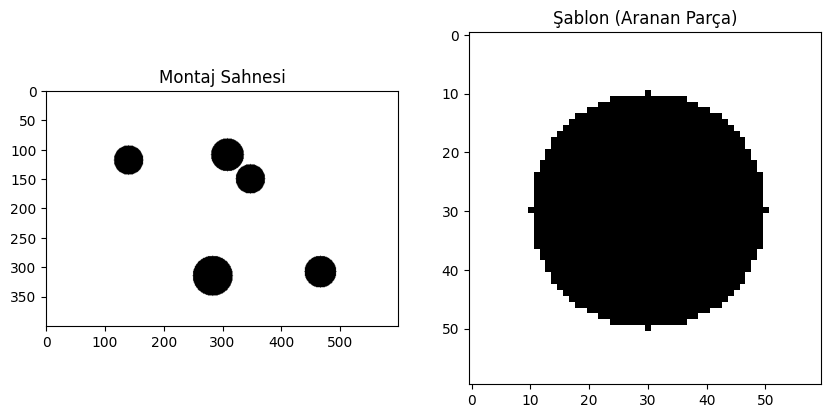

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Boş bir görüntü (beyaz zemin) oluştur
img = np.ones((400, 600), dtype=np.uint8) * 255  # 400x600 piksel

# 2. Rastgele daireler (montaj parçaları) ekle
for _ in range(5):
    center = (np.random.randint(100, 500), np.random.randint(100, 500))
    radius = np.random.randint(20, 40)
    cv2.circle(img, center, radius, 0, -1)  # Siyah daireler

# 3. Şablon olarak küçük bir daire oluştur (montajı kontrol edilecek parça)
template = np.ones((60, 60), dtype=np.uint8) * 255
cv2.circle(template, (30, 30), 20, 0, -1)  # 20px yarıçaplı daire

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Montaj Sahnesi")
plt.subplot(122), plt.imshow(template, cmap='gray'), plt.title("Şablon (Aranan Parça)")
plt.show()

2. Adım: Şablon Eşleme ile Montaj Kontrolü


❌ HATA: Parça bulunamadı!


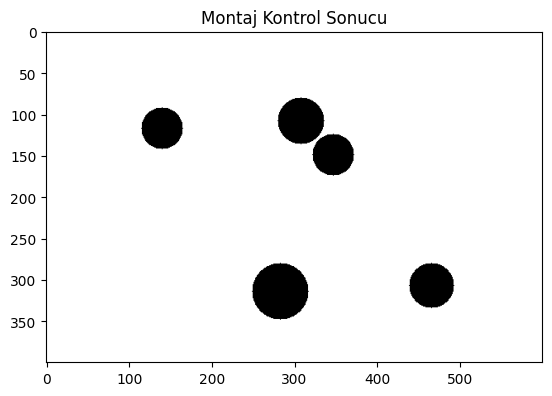

In [ ]:
# Şablon eşleme yap
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Eşik değeri belirle (örneğin %80 eşleşme)
threshold = 0.8
if max_val >= threshold:
    print("✅ Montaj Doğru! Parça bulundu.")
    # Eşleşen bölgeyi işaretle
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 0, 2)  # Siyah dikdörtgen çiz
else:
    print("❌ HATA: Parça bulunamadı!")

# Sonucu göster
plt.imshow(img, cmap='gray')
plt.title("Montaj Kontrol Sonucu")
plt.show()

3. Adım: Senaryoyu Genişletme (Opsiyonel)
Gerçek Zamanlı Simülasyon: Kamera yerine webcam kullanmak için:

In [ ]:
cap = cv2.VideoCapture(0)  # Webcam'den canlı görüntü al

1. Adım: 3D Derinlik Haritası Oluşturma


3D Simülasyon: Numpy ile rastgele derinlik haritası oluşturabiliriz.

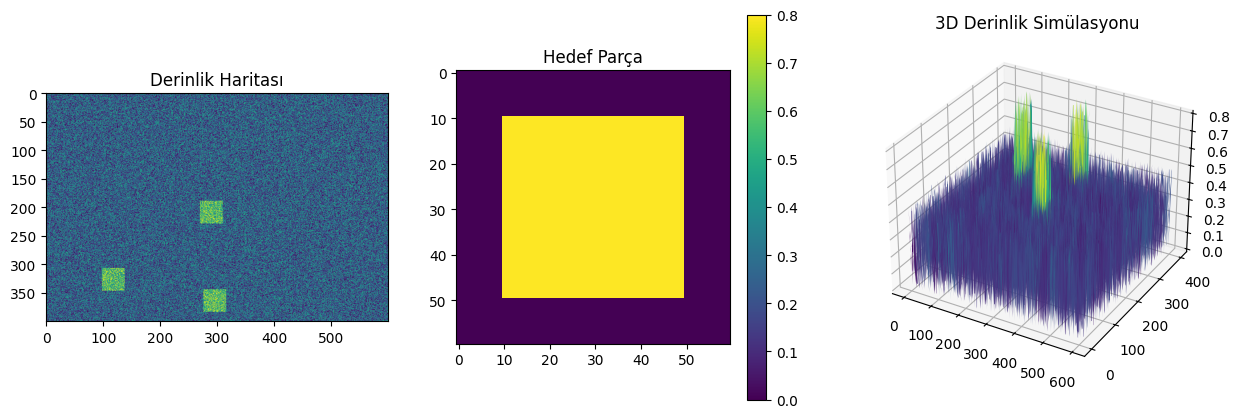

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Rastgele derinlik haritası (400x600 piksel, 0-1 arası değerler)
depth_map = np.random.rand(400, 600) * 0.5  # Temel zemin (0.5 derinlik)

# 2. Montajlanacak parçaları simüle et (belirli bölgelerde derinlik artışı)
for _ in range(3):
    x, y = np.random.randint(100, 500), np.random.randint(100, 500)
    depth_map[x-20:x+20, y-20:y+20] += 0.3  # Parça bölgesi (0.8 derinlik)

# 3. Hedef parçayı oluştur (doğru montaj için referans)
target_piece = np.zeros((60, 60))
target_piece[10:50, 10:50] = 0.8  # Merkezde kare şeklinde parça

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(depth_map, cmap='viridis'), plt.title("Derinlik Haritası")
plt.subplot(132), plt.imshow(target_piece, cmap='viridis'), plt.title("Hedef Parça")
plt.colorbar()

# 3D Yüzey Grafiği
ax = plt.subplot(133, projection='3d')
X, Y = np.meshgrid(np.arange(depth_map.shape[1]), np.arange(depth_map.shape[0]))
ax.plot_surface(X, Y, depth_map, cmap='viridis')
ax.set_title("3D Derinlik Simülasyonu")
plt.show()

2. Adım: 3D Montaj Doğrulama


✅ 3D Montaj Doğrulandı! Parça konumu: (266, 334)


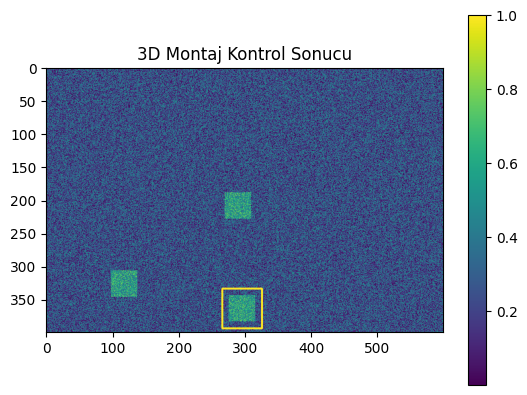

In [ ]:
# 1. Hedef parçayı derinlik haritasında ara
result = cv2.matchTemplate(depth_map.astype(np.float32), target_piece.astype(np.float32), cv2.TM_CCOEFF_NORMED)

# 2. Eşik değeri ile kontrol
threshold = 0.7
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

if max_val >= threshold:
    print("✅ 3D Montaj Doğrulandı! Parça konumu:", max_loc)
    # Eşleşen bölgeyi işaretle
    h, w = target_piece.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(depth_map, top_left, bottom_right, 1.0, 2)  # Beyaz dikdörtgen
else:
    print("❌ HATA: Parça 3D konumda bulunamadı!")

# Sonucu göster
plt.imshow(depth_map, cmap='viridis')
plt.title("3D Montaj Kontrol Sonucu")
plt.colorbar()
plt.show()

3. Adım: Gerçekçi Senaryo için Geliştirmeler
A. Gürültü Ekleyerek Simülasyonu Gerçekçileştirme

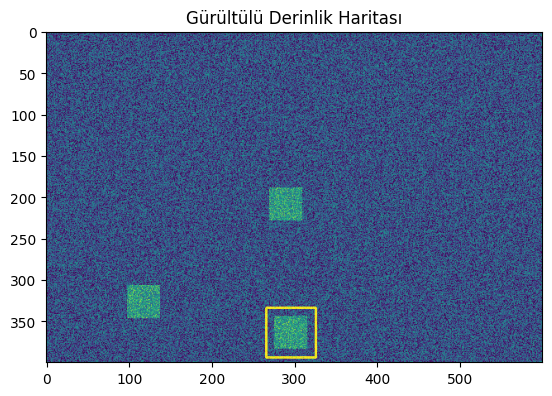

In [ ]:
# Gaussian gürültüsü ekle
noise = np.random.normal(0, 0.05, depth_map.shape)
depth_map_noisy = np.clip(depth_map + noise, 0, 1)

plt.imshow(depth_map_noisy, cmap='viridis')
plt.title("Gürültülü Derinlik Haritası")
plt.show()

B. Çoklu Parça Kontrolü


In [ ]:
# Tüm eşleşmeleri bul
locations = np.where(result >= threshold)
for pt in zip(*locations[::-1]):  # Tüm pozisyonları işaretle
    cv2.rectangle(depth_map, pt, (pt[0] + w, pt[1] + h), 1.0, 2)

Hata Senaryoları Simüle Edin:

Derinlik haritasında eksik parça oluşturup hata yakalayın.

1. Adım: Kasıtlı Hatalı Derinlik Haritası Oluşturma

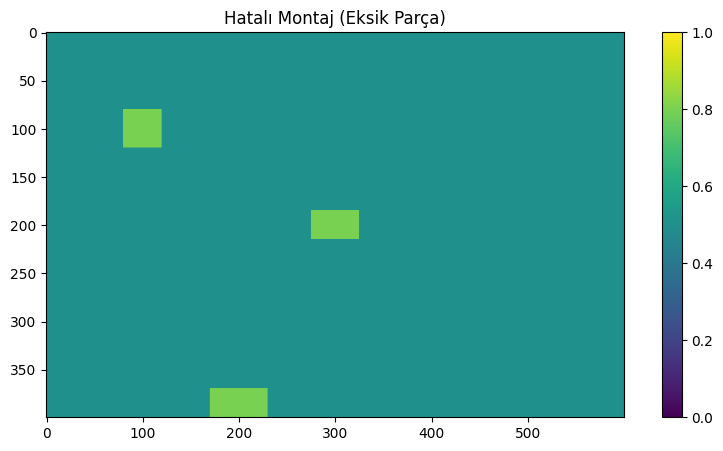

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Temel derinlik haritası oluştur (hepsi 0.5 derinlikte)
depth_map = np.ones((400, 600)) * 0.5

# 2. DOĞRU MONTAJLANMIŞ PARÇALAR (3 adet)
correct_pieces = [
    {"center": (100, 100), "size": (40, 40), "depth": 0.8},
    {"center": (300, 200), "size": (50, 30), "depth": 0.8},
    {"center": (200, 400), "size": (60, 60), "depth": 0.8}
]

for piece in correct_pieces:
    x, y = piece["center"]
    w, h = piece["size"]
    depth_map[y-h//2:y+h//2, x-w//2:x+w//2] = piece["depth"]

# 3. KASITLI EKSİK PARÇA (HATALI MONTAJ)
# Bu parça derinlik haritasına EKLENMEYECEK!
missing_piece = {"center": (400, 100), "size": (70, 70), "depth": 0.8}

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(depth_map, cmap='viridis', vmin=0, vmax=1)
plt.title("Hatalı Montaj (Eksik Parça)")
plt.colorbar()
plt.show()

2. Adım: Hata Tespit Algoritması


✅ Parça 1: DOĞRU (Ortalama derinlik: 0.80)
✅ Parça 2: DOĞRU (Ortalama derinlik: 0.80)
✅ Parça 3: DOĞRU (Ortalama derinlik: 0.80)
❌ Parça 4: HATALI (Ortalama derinlik: 0.50, Beklenen: 0.8)


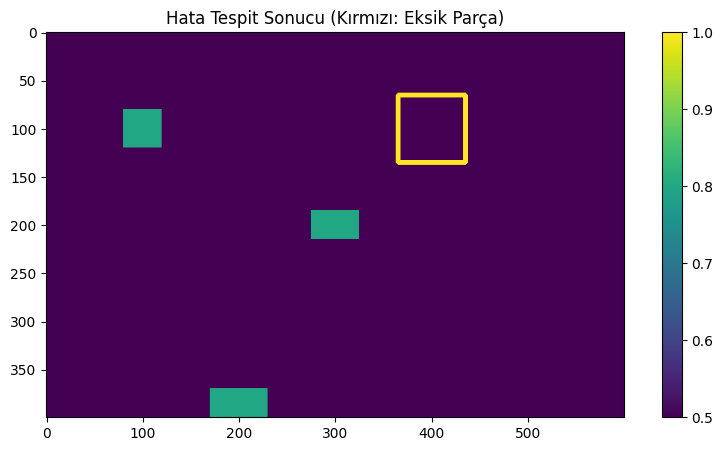

In [ ]:
# 1. Tüm beklenen parçaların listesi (doğrular + eksik olan)
all_pieces = correct_pieces + [missing_piece]

# 2. Her parçayı kontrol et
for i, piece in enumerate(all_pieces):
    x, y = piece["center"]
    w, h = piece["size"]

    # Parça bölgesini kes
    piece_region = depth_map[y-h//2:y+h//2, x-w//2:x+w//2]

    # Ortalama derinlik kontrolü
    mean_depth = np.mean(piece_region) if piece_region.size > 0 else 0

    if mean_depth >= piece["depth"] * 0.9:  # %90 tolerans
        print(f"✅ Parça {i+1}: DOĞRU (Ortalama derinlik: {mean_depth:.2f})")
    else:
        print(f"❌ Parça {i+1}: HATALI (Ortalama derinlik: {mean_depth:.2f}, Beklenen: {piece['depth']})")
        # Hatalı bölgeyi işaretle
        cv2.rectangle(depth_map, (x-w//2, y-h//2), (x+w//2, y+h//2), 1.0, 3)

# Sonucu göster
plt.figure(figsize=(10, 5))
plt.imshow(depth_map, cmap='viridis')
plt.title("Hata Tespit Sonucu (Kırmızı: Eksik Parça)")
plt.colorbar()
plt.show()

3. Adım: Gelişmiş Hata Analizi (OPSİYONEL)
A. Gürültülü Veride Hata Tespiti

In [ ]:
# Gaussian gürültüsü ekle
noise = np.random.normal(0, 0.1, depth_map.shape)
noisy_depth = np.clip(depth_map + noise, 0, 1)

# Yeniden kontrol et
piece_region = noisy_depth[y-h//2:y+h//2, x-w//2:x+w//2]
mean_depth = np.mean(piece_region)
print(f"Gürültülü veride ortalama derinlik: {mean_depth:.2f}")

Gürültülü veride ortalama derinlik: 0.56


B. Birden Fazla Eksik Parça Senaryosu


In [ ]:
# Yeni eksik parça ekle
extra_missing_piece = {"center": (500, 300), "size": (80, 40), "depth": 0.8}
all_pieces.append(extra_missing_piece)

# Kontrol fonksiyonunu yeniden çalıştırın

4. Adım: Sizin Test Etmeniz İçin
Hata Türlerini Çeşitlendirin:

In [ ]:
# Yanlış derinlikte montajlanmış parça
wrong_depth_piece = {"center": (100, 300), "size": (40, 40), "depth": 0.6}
depth_map[300-20:300+20, 100-20:100+20] = 0.4  # 0.8 yerine 0.4

Gerçek Kamera Verisi Simülasyonu:



In [ ]:
# RealSense kamera benzetimi (Depth scale faktörü)
simulated_realsense_data = (depth_map * 1000).astype(np.uint16)

✅ Parça 1: DOĞRU (Ortalama derinlik: 0.80)
✅ Parça 2: DOĞRU (Ortalama derinlik: 0.80)
✅ Parça 3: DOĞRU (Ortalama derinlik: 0.80)
❌ Parça 4: HATALI (Ortalama derinlik: 0.50, Beklenen: 0.8)

Eksik parça yerine yanlış yönlendirilmiş parça simülasyonu yapalım mı?

Robot kolu entegrasyonu için hata durumunda sinyal üretelim mi?

Daha gerçekçi derinlik verisi için CAD modelinden veri aktaralım mı?


1. Adım: Yanlış Yönlendirilmiş Parça Simülasyonu
A. Döndürülmüş Şablon Oluşturma

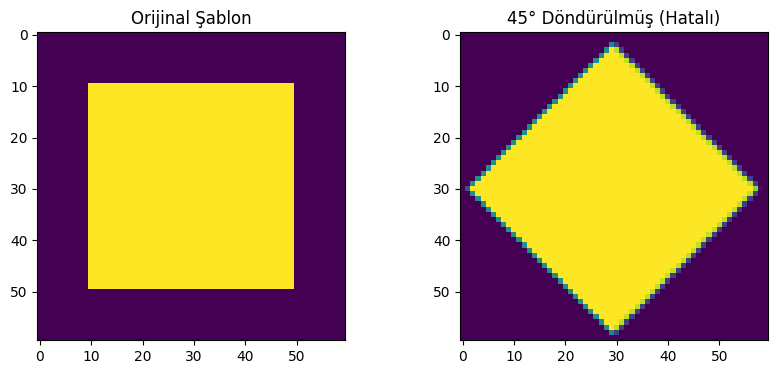

In [ ]:
import cv2
import numpy as np

# 1. Orijinal şablon (kare parça)
template = np.zeros((60, 60), dtype=np.float32)
template[10:50, 10:50] = 0.8  # Merkezde kare

# 2. Yanlış yönlendirilmiş şablon (45 derece döndürülmüş)
M = cv2.getRotationMatrix2D((30, 30), 45, 1)  # Dönüş matrisi
rotated_template = cv2.warpAffine(template, M, (60, 60))

# Görselleştirme
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(template, cmap='viridis'), plt.title("Orijinal Şablon")
plt.subplot(122), plt.imshow(rotated_template, cmap='viridis'), plt.title("45° Döndürülmüş (Hatalı)")
plt.show()

B. Yönlendirme Hatası Tespiti


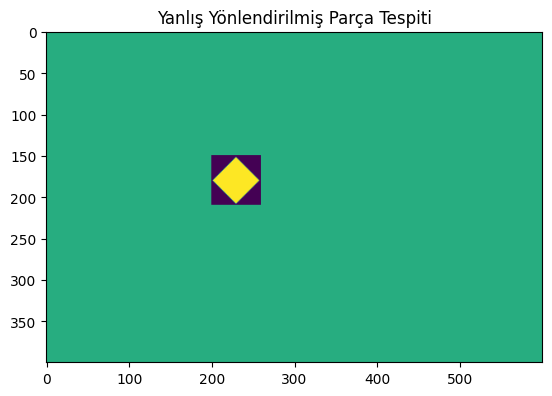

In [ ]:
# Derinlik haritasına döndürülmüş parça ekle (HATALI MONTAJ)
depth_map = np.ones((400, 600)) * 0.5
x, y = 200, 150
depth_map[y:y+60, x:x+60] = rotated_template  # Yanlış yönlendirilmiş parça

# Orijinal şablon ile eşleştirme
result = cv2.matchTemplate(depth_map.astype(np.float32), template.astype(np.float32), cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Sonuç
threshold = 0.65
if max_val < threshold:
    print(f"❌ YÖN HATASI: Eşleşme skoru {max_val:.2f} (Beklenen: {threshold})")
    # Hata alanını işaretle
    cv2.rectangle(depth_map, (x, y), (x+60, y+60), 1.0, 3)

plt.imshow(depth_map, cmap='viridis')
plt.title("Yanlış Yönlendirilmiş Parça Tespiti")
plt.show()

2. Adım: Robot Kol Entegrasyonu için Sinyal Üretme
A. Basit GPIO Sinyali Simülasyonu

In [ ]:
# Hata durumunda robot koluna sinyal gönder
def send_signal_to_robot(error_type):
    if error_type == "missing":
        print("🚨 ROBOT KOLUNA SİNYAL: Eksik parça hatası!")
    elif error_type == "rotation":
        print("🔄 ROBOT KOLUNA SİNYAL: Parça yanlış yönlendirilmiş!")
    # Gerçek uygulamada: GPIO.setup() / GPIO.output() (Raspberry Pi)

# Önceki hata tespitinde kullanım
send_signal_to_robot("rotation")

🔄 ROBOT KOLUNA SİNYAL: Parça yanlış yönlendirilmiş!


B. ROS Entegrasyonu (Opsiyonel)


1. Colab'da ROS Simülasyonu (Alternatif Yöntem)
ROS kurmadan robot kontrolü simüle etmek için basit bir Python socket veya MQTT kullanabiliriz:

A. Socket ile Sinyal Gönderme (Colab Uyumlu)

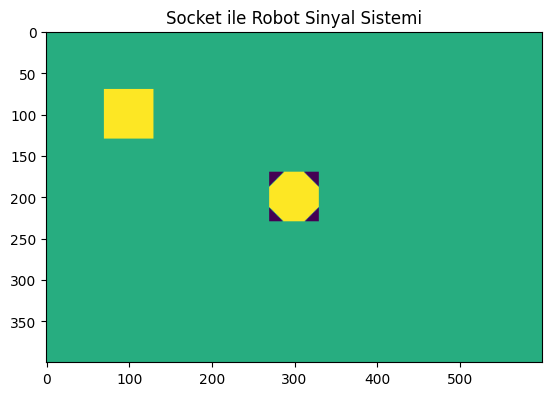

In [ ]:
import cv2
import numpy as np
import socket
import time

# Socket ayarları (Örnek IP/port - gerçek sistemde robot IP'si yazılacak)
ROBOT_IP = "127.0.0.1"  # Localhost simülasyonu
PORT = 65432

def send_robot_command(command):
    try:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((ROBOT_IP, PORT))
            s.sendall(command.encode())
            print(f"🤖 ROBOTA GÖNDERİLDİ: {command}")
    except Exception as e:
        print(f"❌ SOCKET HATASI: {str(e)}")

# 1. Simüle edilmiş derinlik haritası oluştur
depth_map = np.ones((400, 600)) * 0.5

# 2. Doğru ve hatalı parçaları yerleştir
def add_part(center, size, depth, angle=0):
    x, y = center
    w, h = size
    part = np.zeros((h, w)) + depth
    if angle != 0:
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        part = cv2.warpAffine(part, M, (w, h))
    depth_map[y-h//2:y+h//2, x-w//2:x+w//2] = part
    return part

# Doğru parça (0° dönüş)
correct_part = add_part((100, 100), (60, 60), 0.8)

# Hatalı parça (45° dönüş)
rotated_part = add_part((300, 200), (60, 60), 0.8, 45)

# 3. Kontrol fonksiyonu
def check_orientation(template, threshold=0.7):
    result = cv2.matchTemplate(depth_map.astype(np.float32), template.astype(np.float32), cv2.TM_CCOEFF_NORMED)
    max_val = cv2.minMaxLoc(result)[1]
    if max_val < threshold:
        send_robot_command("ROTATION_ERROR")  # Robot koluna sinyal gitmesi
        cv2.putText(depth_map, "HATALI YON", (300-30, 200-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1.0, 2)

# Kontrolü çalıştır
check_orientation(correct_part)

# Görselleştirme
plt.imshow(depth_map, cmap='viridis')
plt.title("Socket ile Robot Sinyal Sistemi")
plt.show()

2. Sonraki Adımlar (Sıralı Plan)
A. Adım: Yanıt Dinleme (Robot Feedback)
Robotun işlem tamamlandı sinyalini dinlemek için:

In [ ]:
def listen_robot():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((ROBOT_IP, PORT))
        s.listen()
        conn, addr = s.accept()
        with conn:
            data = conn.recv(1024).decode()
            print(f"ROBOT DURUMU: {data}")

# Arka planda çalıştırmak için threading kullanılabilir

B. Adım: Çoklu Hata Senaryoları
Eksik parça + yanlış yön kombinasyonu

Parça boyut farklılıklarını tespit

In [ ]:
def check_multiple_errors():
    # Eksik parça kontrolü
    if np.mean(depth_map[400:460, 500:560]) < 0.1:
        send_robot_command("MISSING_PART")

    # Yanlış yön kontrolü (yukarıdaki örnekteki gibi)
    check_orientation(correct_part)

C. Adım: Gerçek Kamera Entegrasyonu
Socket ile USB kamera/RealSense bağlantısı:

In [ ]:
cap = cv2.VideoCapture(0)  # Webcam
while True:
    ret, frame = cap.read()
    if not ret:
        send_robot_command("CAMERA_ERROR")
        break

❌ SOCKET HATASI: [Errno 111] Connection refused


Robot Yanıt Simülasyonu:

Robot tarafında bir Python socket sunucusu çalıştırıp, Colab'dan gelen komutlara yanıt verdirelim.

Çoklu Parça Kontrolü:

Montaj hattında 5 farklı parçanın konum/yön kontrolü.

Gerçek Donanım Testi:

Raspberry Pi üzerinde socket sunucusu kurup, LED veya servo motor kontrolü.

1. Senaryo: Robot Yanıt Simülasyonu
A. Robot Tarafında Socket Sunucusu (Local'de Çalıştırılacak)

In [ ]:
# robot_server.py (Local makinede çalıştırın)
import socket

HOST = "0.0.0.0"  # Tüm ağ arayüzlerini dinle
PORT = 65432

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen()
    print(f"🤖 ROBOT SUNUCU BAŞLATILDI: {PORT} portunu dinliyor...")
    conn, addr = s.accept()
    with conn:
        print(f"{addr} bağlandı")
        while True:
            data = conn.recv(1024).decode()
            if not data:
                break
            print(f"Gelen Komut: {data}")
            if "ERROR" in data:
                conn.sendall(b"ROBOT: Hata tespit edildi, düzeltiliyor...")
            else:
                conn.sendall(b"ROBOT: Komut basarili")

2. Senaryo: Çoklu Parça Kontrolü
A. 5 Parçalı Montaj Simülasyonu

✅ Tüm parçalar doğru montajlandı!


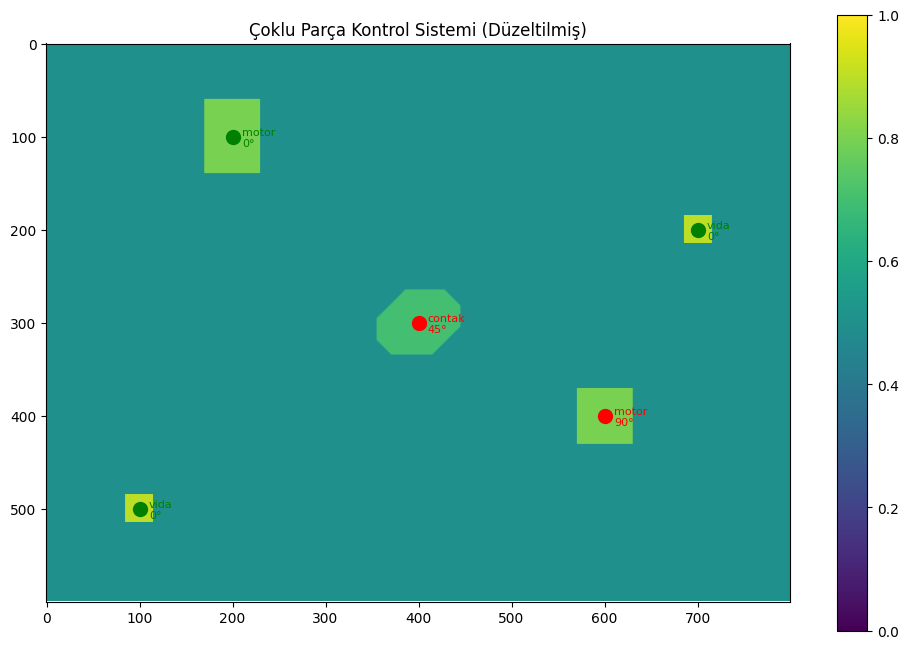

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Derinlik haritası oluştur (CV_32F formatında)
depth_map = np.ones((600, 800), dtype=np.float32) * 0.5  # Dikkat: dtype=np.float32

# 2. Parça şablonlarını tanımla (CV_32F formatında)
templates = {
    "motor": np.zeros((80, 60), dtype=np.float32) + 0.8,
    "contak": np.zeros((70, 90), dtype=np.float32) + 0.7,
    "vida": np.zeros((30, 30), dtype=np.float32) + 0.9
}

# 3. Parçaları yerleştirme fonksiyonu
def place_part(depth_map, template, center, angle=0):
    h, w = template.shape
    x, y = center
    part = template.copy()

    if angle != 0:
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        part = cv2.warpAffine(part, M, (w, h), borderValue=0.5)

    # Parçayı derinlik haritasına yerleştir
    y1, y2 = max(0, y-h//2), min(depth_map.shape[0], y+h//2)
    x1, x2 = max(0, x-w//2), min(depth_map.shape[1], x+w//2)

    part_h, part_w = y2-y1, x2-x1
    if part_h <=0 or part_w <=0: return

    part = cv2.resize(part, (part_w, part_h))
    depth_map[y1:y2, x1:x2] = part

# 4. Parçaları yerleştir
parts = [
    {"name": "motor", "center": (200, 100), "angle": 0, "correct": True},
    {"name": "contak", "center": (400, 300), "angle": 45, "correct": False},
    {"name": "vida", "center": (100, 500), "angle": 0, "correct": True},
    {"name": "motor", "center": (600, 400), "angle": 90, "correct": False},
    {"name": "vida", "center": (700, 200), "angle": 0, "correct": True}
]

for part in parts:
    place_part(depth_map, templates[part["name"]], part["center"], part["angle"])

# 5. Kontrol fonksiyonu (DÜZELTİLMİŞ)
def check_assembly():
    errors = []
    for part in parts:
        template = templates[part["name"]]

        # Şablonu döndürme
        if part["angle"] != 0:
            M = cv2.getRotationMatrix2D((template.shape[1]//2, template.shape[0]//2), part["angle"], 1)
            rotated_template = cv2.warpAffine(template, M, (template.shape[1], template.shape[0]), borderValue=0.5)
        else:
            rotated_template = template

        # MatchTemplate için ROI belirleme
        x, y = part["center"]
        h, w = rotated_template.shape
        y1, y2 = max(0, y-h//2), min(depth_map.shape[0], y+h//2)
        x1, x2 = max(0, x-w//2), min(depth_map.shape[1], x+w//2)

        if (y2-y1) != h or (x2-x1) != w:
            print(f"⚠️ {part['name']} sınırları aşıyor, kontrol edilemiyor")
            continue

        roi = depth_map[y1:y2, x1:x2]

        # Veri tipi kontrolü
        if roi.dtype != rotated_template.dtype:
            roi = roi.astype(np.float32)

        result = cv2.matchTemplate(roi, rotated_template, cv2.TM_CCOEFF_NORMED)
        max_val = cv2.minMaxLoc(result)[1]

        if max_val < 0.7:  # Eşik değeri
            errors.append(part["name"])
            print(f"❌ {part['name']} hatalı (Eşleşme: {max_val:.2f}, Açı: {part['angle']}°)")

    return errors

# 6. Kontrolü çalıştır
errors = check_assembly()
if not errors:
    print("✅ Tüm parçalar doğru montajlandı!")

# 7. Görselleştirme
plt.figure(figsize=(12, 8))
plt.imshow(depth_map, cmap='viridis', vmin=0, vmax=1)
for part in parts:
    color = 'red' if not part["correct"] else 'green'
    plt.scatter(part["center"][0], part["center"][1], c=color, s=100)
    plt.text(part["center"][0]+10, part["center"][1]+10,
             f"{part['name']}\n{part['angle']}°",
             color=color, fontsize=8)
plt.title("Çoklu Parça Kontrol Sistemi (Düzeltilmiş)")
plt.colorbar()
plt.show()